1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

The covariance calculated by numpy is:  [[ 1.00450766  1.07483581  3.08385113]
 [ 1.07483581  9.57962132 11.72929294]
 [ 3.08385113 11.72929294 17.8969952 ]]
The manually calculated covariance is: [[ 1.00470656  1.07550134  3.08491445]
 [ 1.07550134  9.58184817 11.73285084]
 [ 3.08491445 11.73285084 17.90267975]]
The eigenvalues are: [ 2.65689206e+01 -1.62317399e-15  1.91220361e+00]
The eigenvectors are: [[-0.12201926 -0.81649658  0.56430899]
 [-0.56911528 -0.40824829 -0.71375145]
 [-0.8131538   0.40824829  0.41486653]]
The SVD eigenvalues are:
 [2.65770000e+01 1.91223447e+00 1.04484005e-30]
 The SVD eigenvector is:

Percentage of the total dataset's variability explained by the principal components:  93.28606695701083
By selecting the component 0 and 1, we retain 100.00% of the total variability


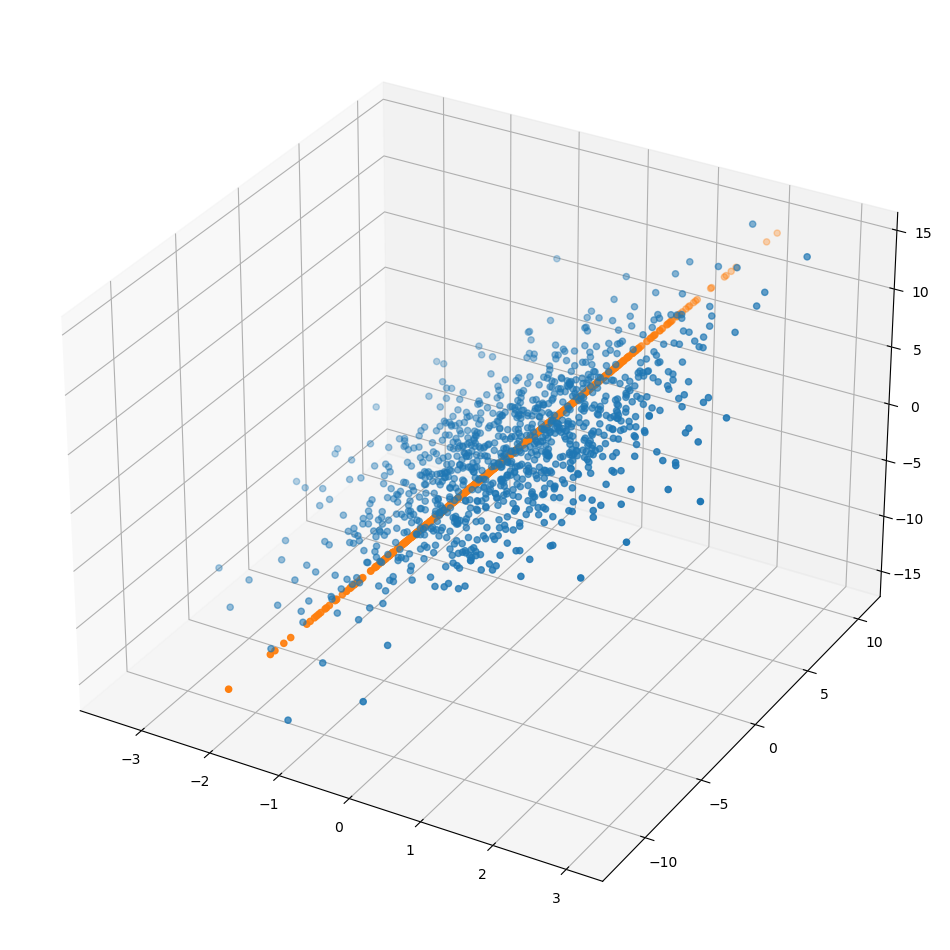

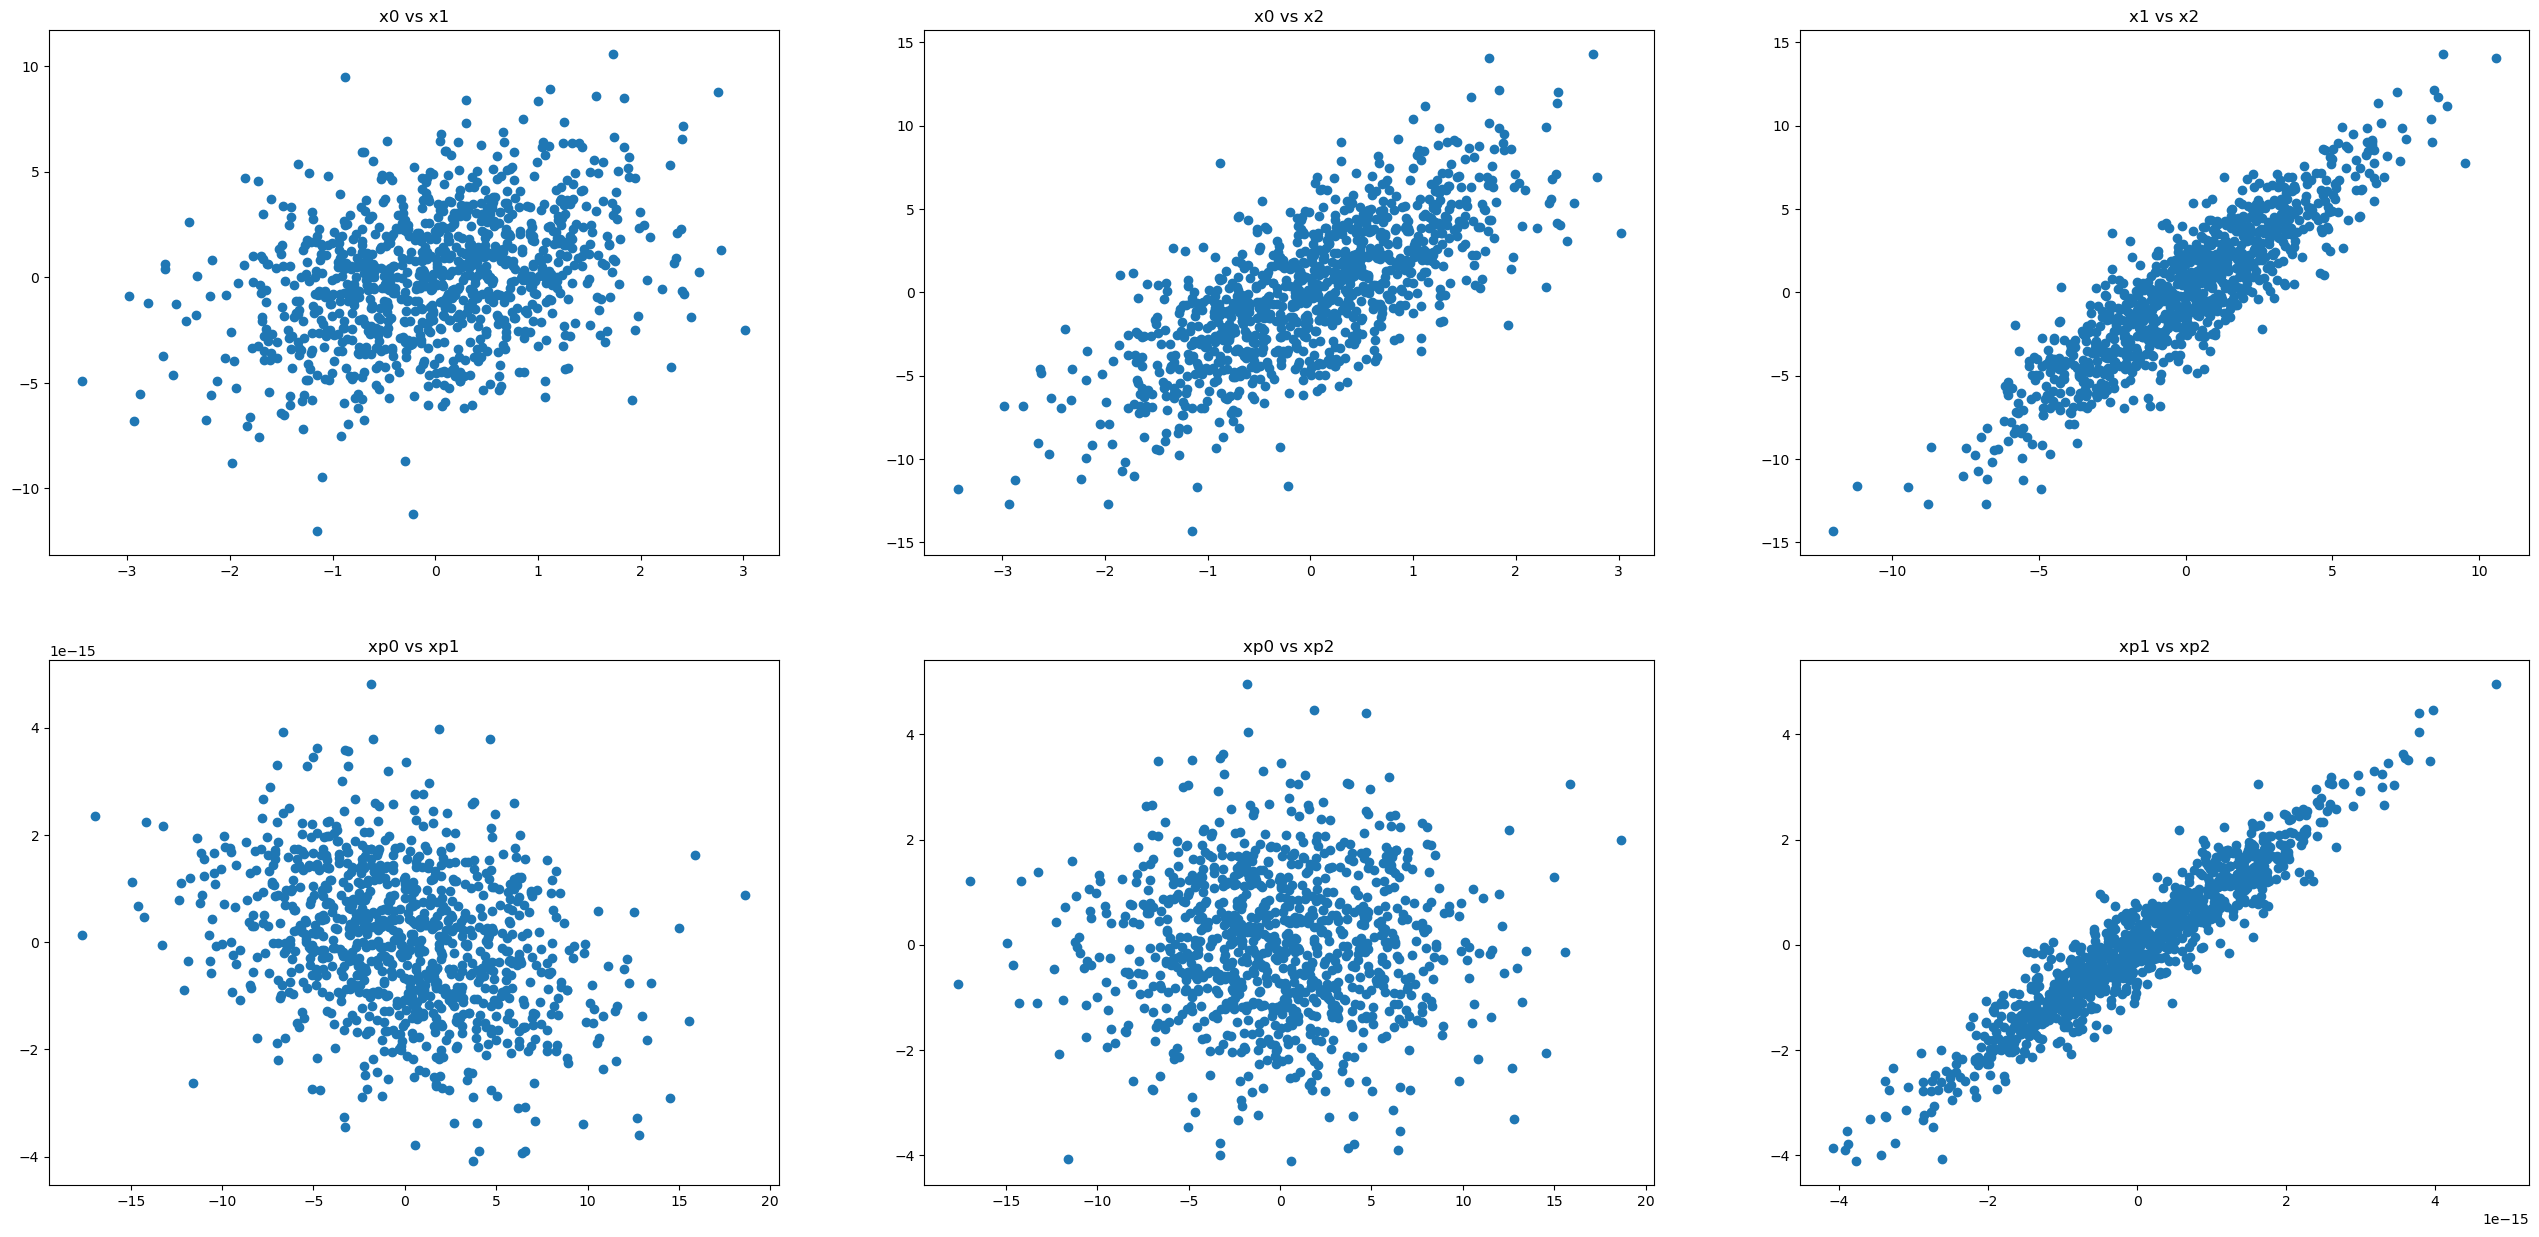

In [4]:

n = 1000
x1 = np.random.normal(0,1,(1,n))
x2 = x1 + np.random.normal(0,3,(1,n))
x3 = 2*x1 + x2


x = np.concatenate((x1,x2,x3), axis = 0)


covariance = np.cov(x)
print("The covariance calculated by numpy is: ",covariance)
new_cov = np.dot(x, x.T)/(n-1)
print("The manually calculated covariance is:",new_cov)

l, v = la.eig(covariance)
l = np.real_if_close(l)

print("The eigenvalues are:", l)
print("The eigenvectors are:", v)

 

u, s, v_t = np.linalg.svd(x)
l_svd = s**2/(n-1)
V_svd = s

print("The SVD eigenvalues are:\n",l_svd)

print(" The SVD eigenvector is:\n")



     

lam = np.diag(np.sort(l)[::-1])
p = lam[0,0]/lam.trace()
variability = ((lam[0,0]+lam[1,1])/lam.trace())
print("Percentage of the total dataset's variability explained by the principal components: ",(p*100))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (variability*100))

indexes = np.argsort(l)[::-1]
new_v= v[:,indexes]
xp = np.dot(v.T,x)
v_features = np.delete(new_v,2,1)
xpp = np.dot(v_features, xp[0:2,:])

fig = plt.figure(figsize=(12,40))
ax = plt.axes(projection="3d")

ax.scatter3D(x[0,:],x[1,:],x[2,:])
ax.scatter3D(xpp[0,:],xpp[1,:],xpp[2,:])

plt.show()
    
fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title("x0 vs x1")
axs[0][0].scatter(x[0,:],x[1,:])
axs[0][1].set_title("x0 vs x2")
axs[0][1].scatter(x[0,:],x[2,:])
axs[0][2].set_title("x1 vs x2")
axs[0][2].scatter(x[1,:],x[2,:])

axs[1][0].set_title("xp0 vs xp1")
axs[1][0].scatter(xp[0,:],xp[1,:])
axs[1][1].set_title("xp0 vs xp2")
axs[1][1].scatter(xp[0,:],xp[2,:])
axs[1][2].set_title("xp1 vs xp2")
axs[1][2].scatter(xp[1,:],xp[2,:])

plt.show()


     





2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Percentage of the total dataset's variability explained by the principal components:  93.24239453216634
By selecting the component 0 and 1, we retain 99.95% of the total variability


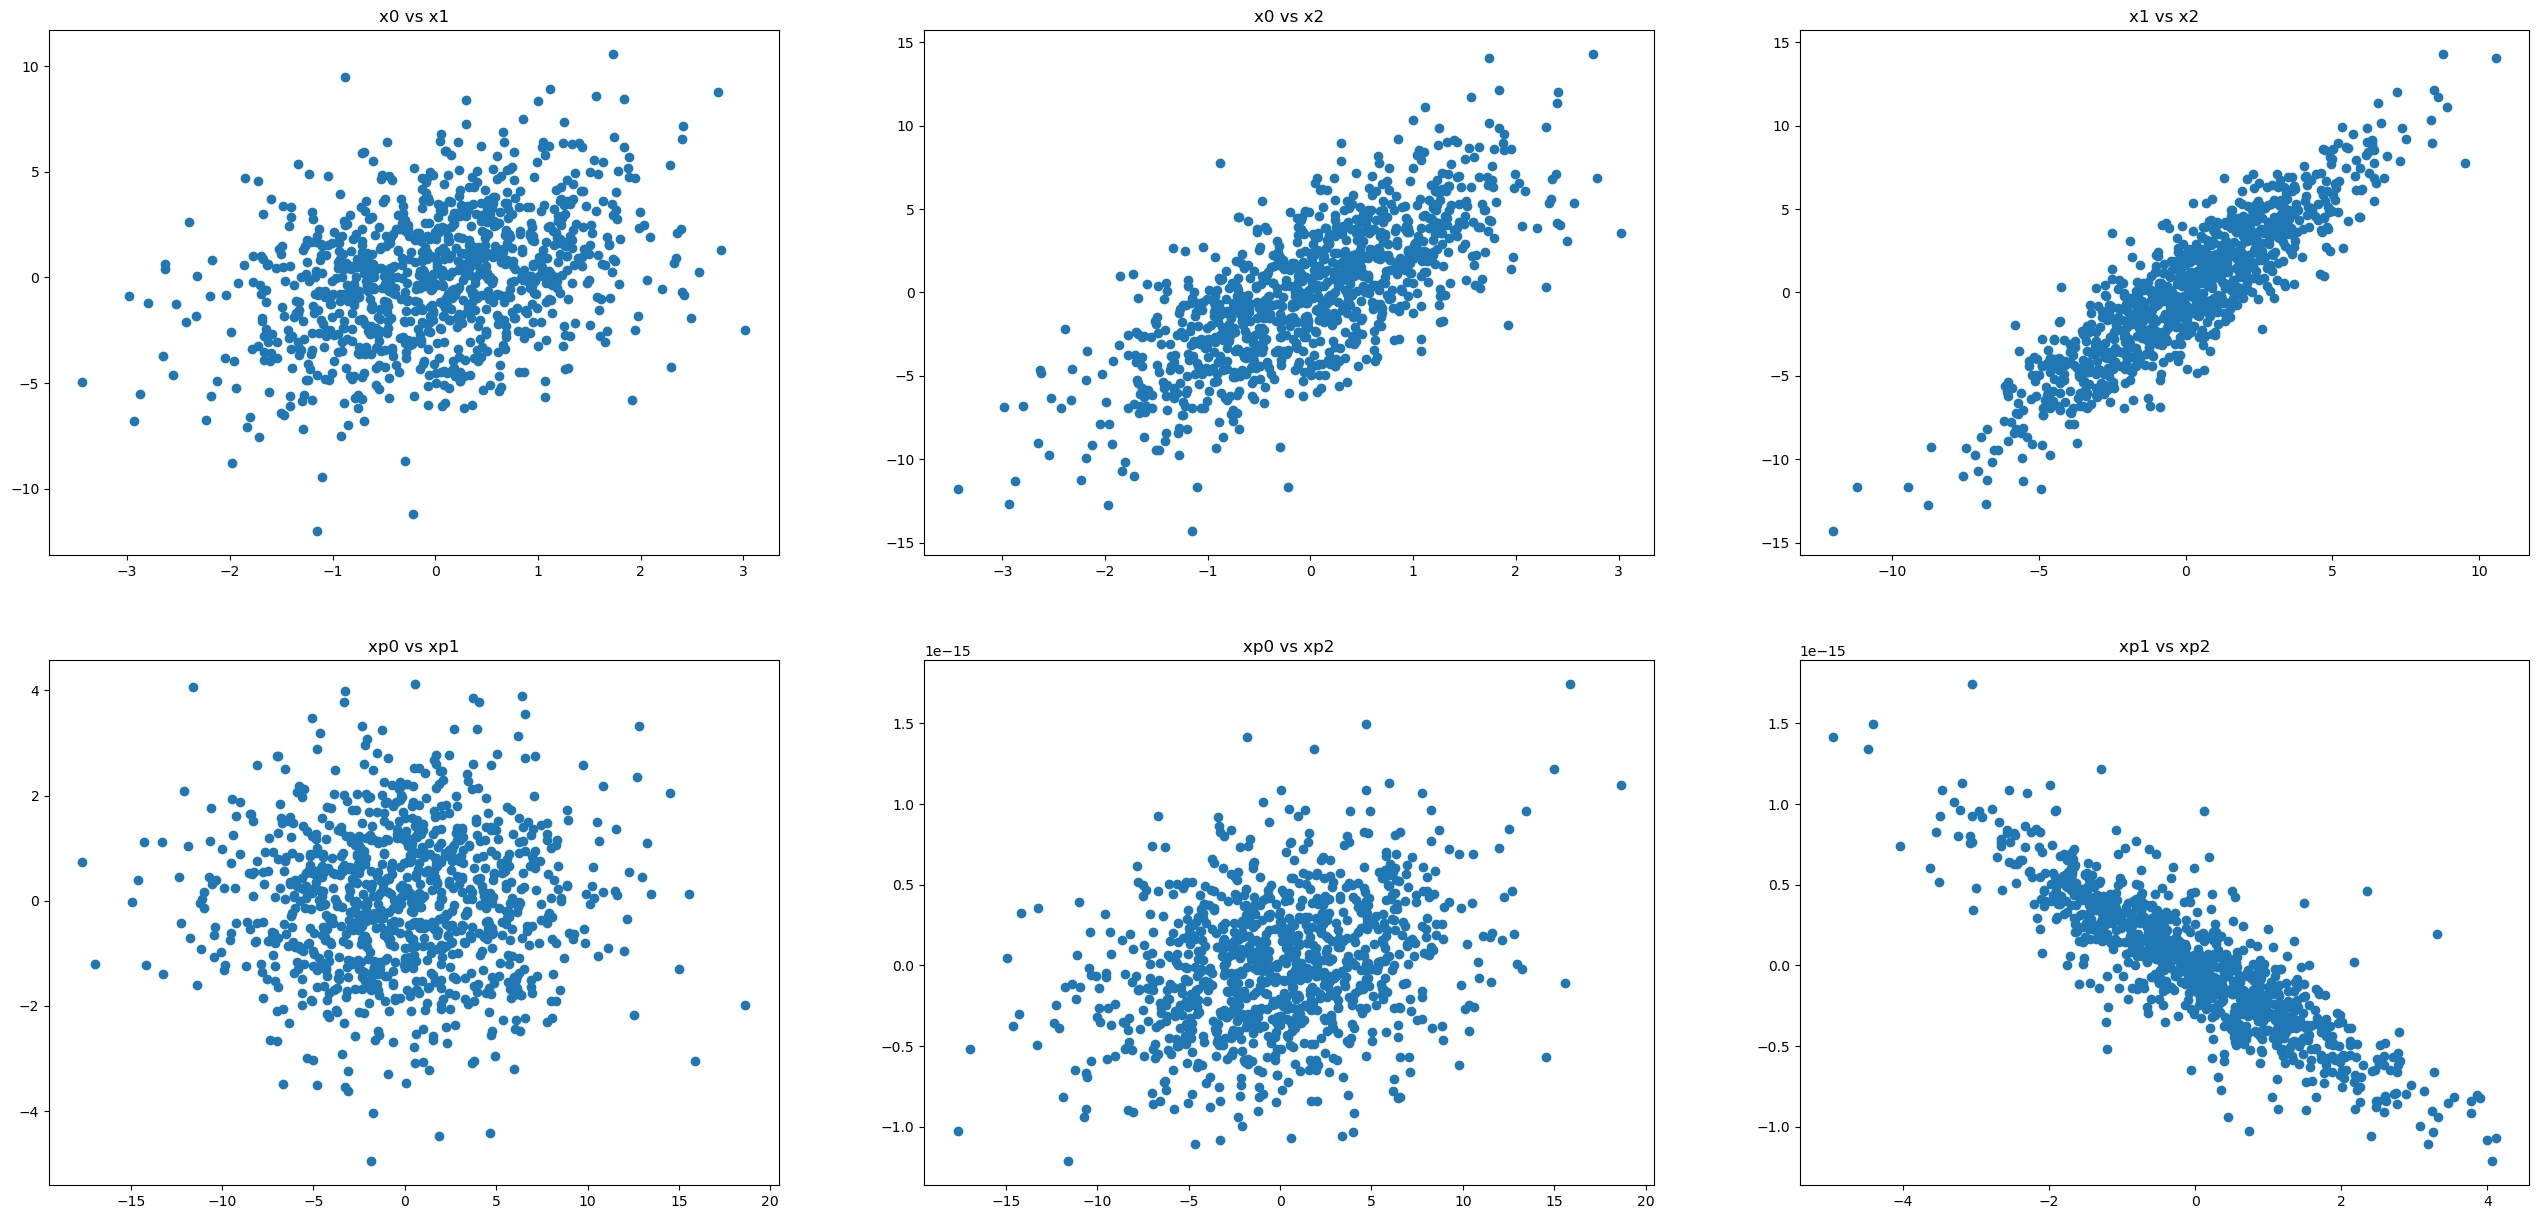

In [12]:
factor = 27
noise = np.random.normal(0,1/factor,(10,n))
x_noise = np.concatenate((x,noise),axis = 0)

covariance = np.cov(x_noise)

l, v = la.eig(covariance)
l = np.real_if_close(l)

lam = np.diag(np.sort(l)[::-1])
p = lam[0,0]/lam.trace()
variability = ((lam[0,0]+lam[1,1])/lam.trace())
print("Percentage of the total dataset's variability explained by the principal components: ",(p*100))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" % (variability*100))

indexes = np.argsort(l)[::-1]
new_v= v[:,indexes]
xp = np.dot(v.T,x_noise)
v_features = np.delete(new_v,2,1)


fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title("x0 vs x1")
axs[0][0].scatter(x_noise[0,:],x_noise[1,:])
axs[0][1].set_title("x0 vs x2")
axs[0][1].scatter(x_noise[0,:],x_noise[2,:])
axs[0][2].set_title("x1 vs x2")
axs[0][2].scatter(x_noise[1,:],x_noise[2,:])

axs[1][0].set_title("xp0 vs xp1")
axs[1][0].scatter(xp[0,:],xp[1,:])
axs[1][1].set_title("xp0 vs xp2")
axs[1][1].scatter(xp[0,:],xp[2,:])
axs[1][2].set_title("xp1 vs xp2")
axs[1][2].scatter(xp[1,:],xp[2,:])

plt.show()



     


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [13]:
# get the dataset and its description on the proper data directory
##!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
##!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-12-05 11:38:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: ‘data/magic04.data’

magic04.data        100%[===================>]   1,41M   302KB/s    in 5,3s    

2022-12-05 11:39:03 (272 KB/s) - ‘data/magic04.data’ salvato [1477391/1477391]

--2022-12-05 11:39:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio in: ‘data/magic04.names’

magic04.names     

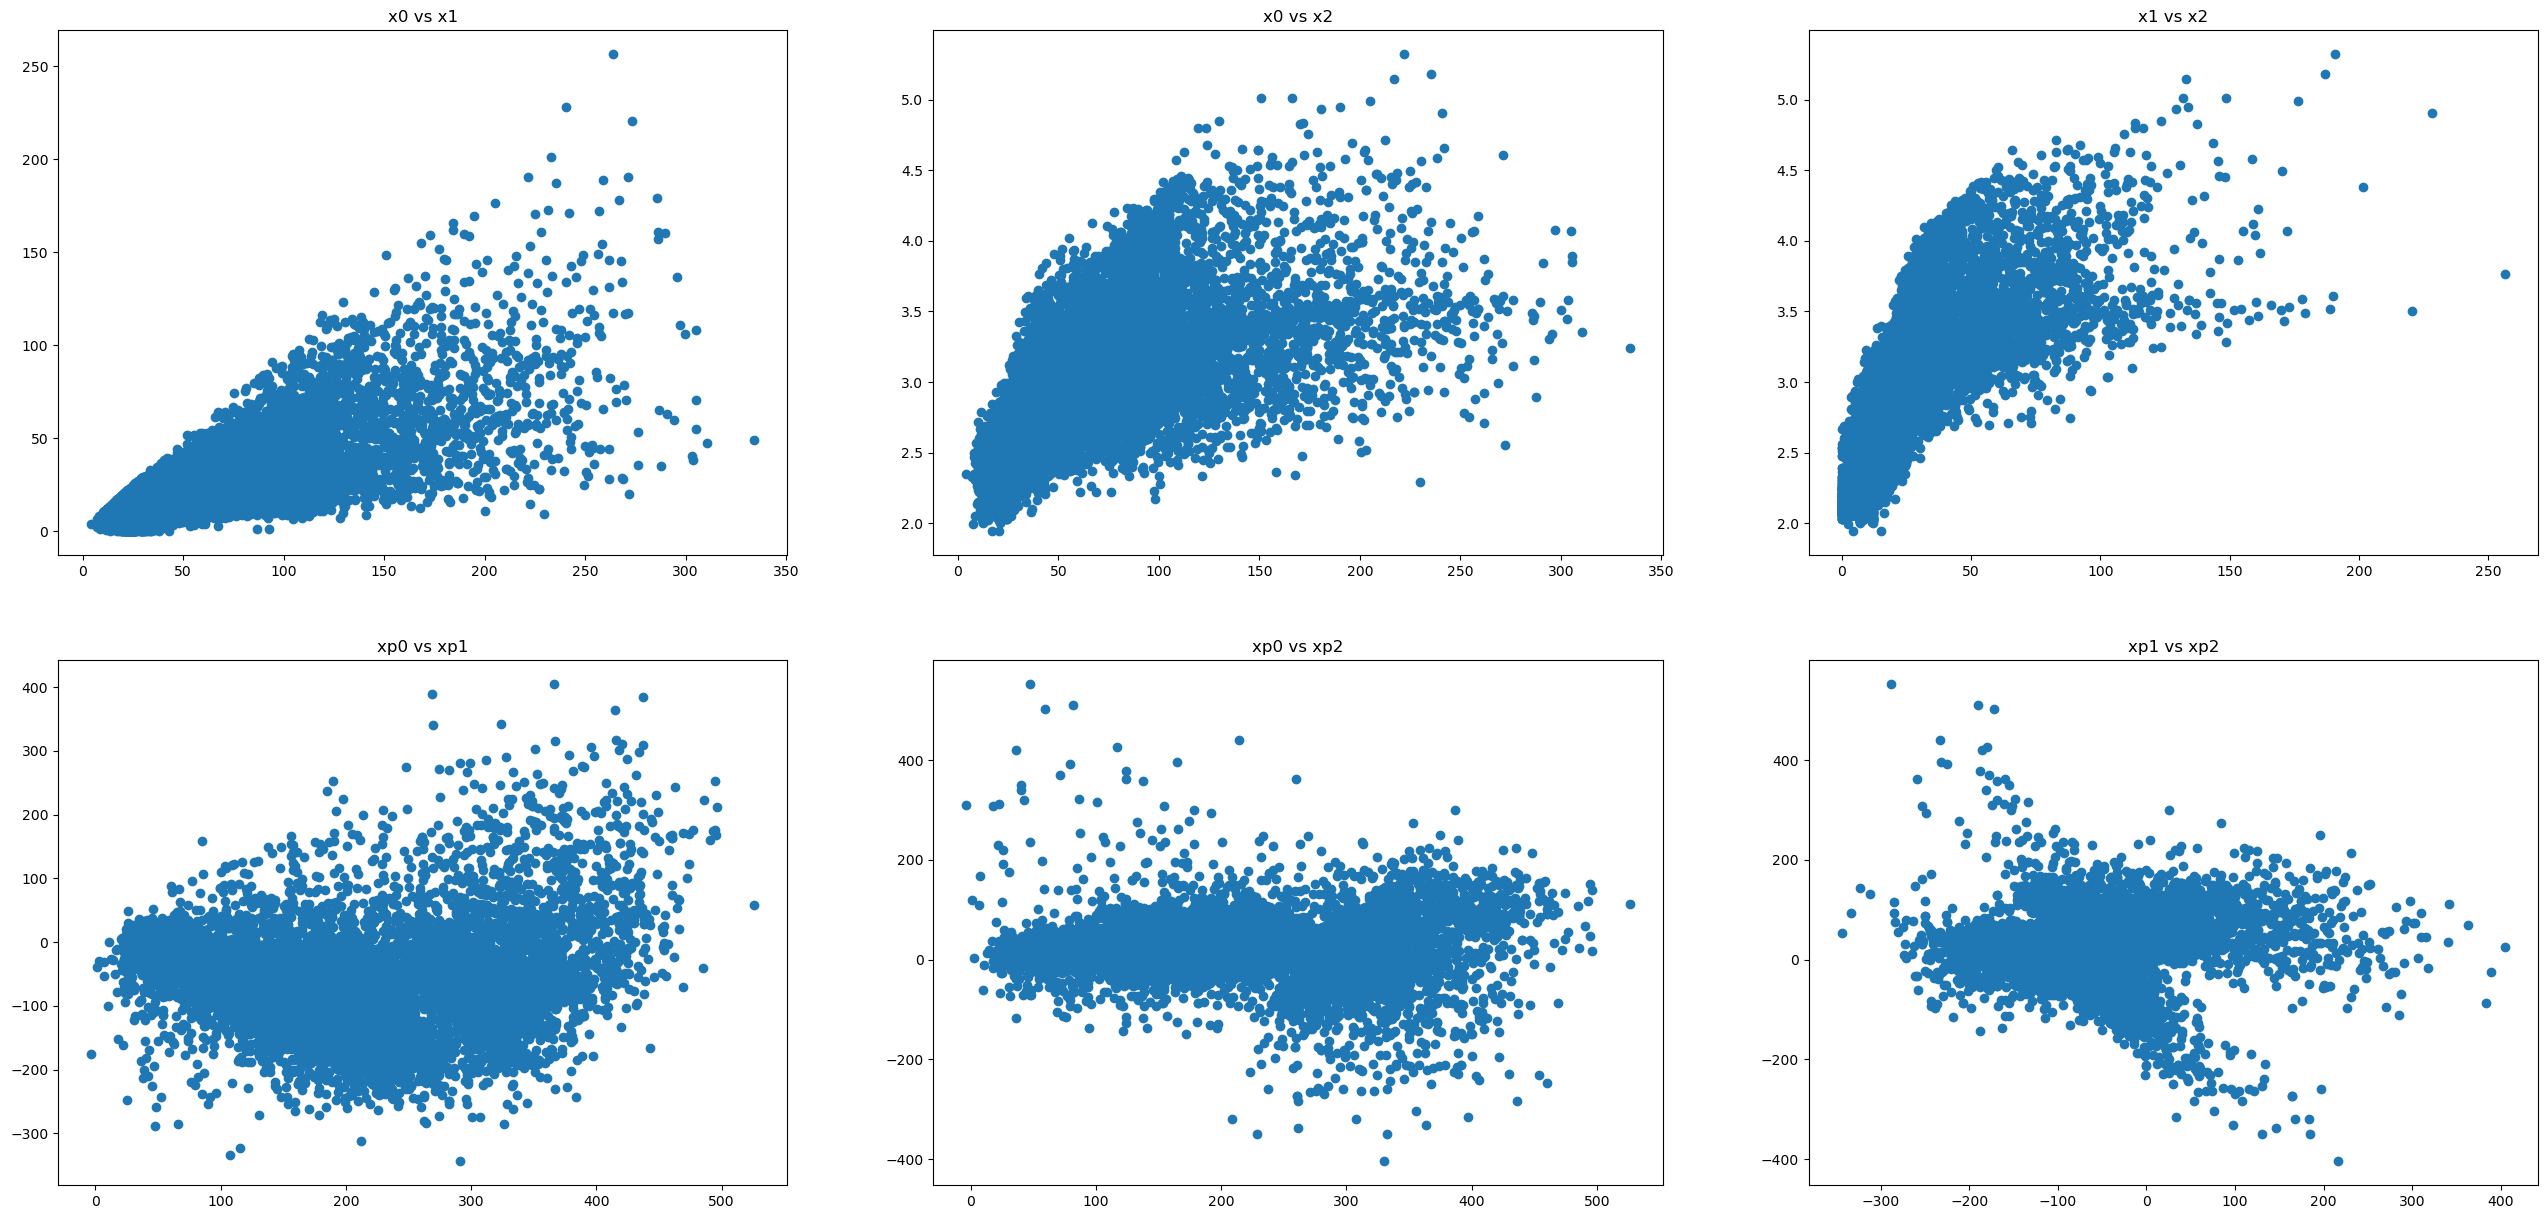

In [17]:


import pandas as pd

dataset = pd.read_csv("data/magic04.data",header = None)

dataset=dataset.iloc[:,:10] ## to compute the covariance i need to get rid of the last column which has not numeric number values
covariance = dataset.cov()

l, v = la.eig(covariance)
l = np.real_if_close(l)
xp = np.dot(v.T,dataset.T)

fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title("x0 vs x1")
axs[0][0].scatter(dataset.iloc[:,0],dataset.iloc[:,1])
axs[0][1].set_title("x0 vs x2")
axs[0][1].scatter(dataset.iloc[:,0],dataset.iloc[:,2])
axs[0][2].set_title("x1 vs x2")
axs[0][2].scatter(dataset.iloc[:,1],dataset.iloc[:,2])

axs[1][0].set_title("xp0 vs xp1")
axs[1][0].scatter(xp[0,:],xp[1,:])
axs[1][1].set_title("xp0 vs xp2")
axs[1][1].scatter(xp[0,:],xp[2,:])
axs[1][2].set_title("xp1 vs xp2")
axs[1][2].scatter(xp[1,:],xp[2,:])

plt.show()



     
